Goal: Capturing images from the newspaper daily headlines displayed by the Newseum. May be a gray area, legally, as Newseum says I need to contact the newspaper publisher directly. But we'll see...

http://www.newseum.org/todaysfrontpages/?tfp_show=all



## Step 1) Downloading the newseum html that contains the links needed.

In [255]:
from urllib.request import urlopen

Using url from the appropriate page on the newseum website (make sure show=all for all possible files), beautifulSoup is used to read the newseum page after downloading. The front page of each newspaper has several links associated, including a link to the paper's site and several image/pdfs kept at their own url. The pdf looks to be the highest res, so I'll grab those and convert to images later with ghostscript.

The links for all these newspaper pdfs are in a script section of the html. I bet there is a nice, pretty way to use bs4 to get that. Instead, I bang it with a rock till I get what I want.

In [256]:
url='http://www.newseum.org/todaysfrontpages/?tfp_show=all' #today
#url="http://www.newseum.org/todaysfrontpages/?tfp_display=archive-date&tfp_archive_id=100113&tfp_show=all"#archive 2013 shutdown 1
html=urlopen(url)
#This next section navigates through the html and prints the date to help verify
#the variable string replacement was successful. We'll get into using BeautifulSoup in the next section!
#Fow now, just treat it asa a black box
from bs4 import BeautifulSoup #black box
soup=BeautifulSoup(html.read(),'html.parser') #black box
soup2=soup.findAll('script')
len(soup2)
l=-1;
loc=-1
#longest script section is the one with all the newspaper front pages, so this give me that correct section.
for x in range(0,len(soup2)):
    if len(str(soup2[x]))>l:
        l=len(str(soup2[x]))
        loc=x
print(loc,l)
soup_string=str(soup2[loc])
soup_str_split=soup_string.split(",")
#getting the links for the pdfs:
soup_pdf_links=[elm[6:].replace('"','').replace("\\/","/") for elm in soup_str_split if elm.startswith('"pdf')]

26 520116


In [257]:
print(len(soup_pdf_links))
soup_pdf_links[:10]

735


['http://cdn.newseum.org/dfp/pdf22/AL_TP.pdf',
 'http://cdn.newseum.org/dfp/pdf22/AL_DD.pdf',
 'http://cdn.newseum.org/dfp/pdf22/AL_DE.pdf',
 'http://cdn.newseum.org/dfp/pdf22/AL_TD.pdf',
 'http://cdn.newseum.org/dfp/pdf22/AL_MA.pdf',
 'http://cdn.newseum.org/dfp/pdf22/AL_OAN.pdf',
 'http://cdn.newseum.org/dfp/pdf22/AL_TN.pdf',
 'http://cdn.newseum.org/dfp/pdf22/AK_ADN.pdf',
 'http://cdn.newseum.org/dfp/pdf22/AK_FDNM.pdf',
 'http://cdn.newseum.org/dfp/pdf22/AK_JE.pdf']

I want to timestamp these. I'll be doing that in a few different ways. First, pdfs for each day will be in their own folder. Second, the filename for each pdf will contain a timestamp.

In [259]:
from time import gmtime, strftime

In [260]:
t=strftime("%Y%m%d") #today
#t="20131017"#archive
url=soup_pdf_links[0]
n=url.split('/pdf22/')[1]#today
#n=url.split('/pdf/')[1]#archive
t+"_"+n

'20180122_AL_TP.pdf'

Direct save of those pdf to a local folder.

In [261]:
from time import gmtime, strftime
import time
import urllib.request
import random
#t=strftime("%Y%m%d")
#t="20131002"#archive
for x in range(0,len(soup_pdf_links)):
    url=soup_pdf_links[x]
    n=url.split('/pdf22/')[1]#today
    #n=url.split('/pdf/')[1]#archive
    label=t+"_"+n
    urllib.request.urlretrieve(url, 'C:/Users/Kyle/Documents/Blog Posts/Newseum/%s/%s'%(t,label))
    wait=random.randrange(10,30,1)*.1;
    time.sleep(wait) #to not abuse the newseum's servers, adding a delay. Making it a bit random to play with mimicing a human.
    if x%10==0:
        print(x,n)

0 AL_TP.pdf
10 AZ_KDM.pdf
20 CA_PT.pdf
30 CA_DP.pdf
40 CA_MIJ.pdf
50 CA_SGVT.pdf
60 CO_DS.pdf
70 CT_NB.pdf
80 FL_SS.pdf
90 FL_SHT.pdf
100 GA_AJC.pdf
110 IL_BND.pdf
120 IL_DH.pdf
130 IN_KT.pdf
140 IA_HE.pdf
150 KY_KE.pdf
160 LA_NS.pdf
170 MD_TS.pdf
180 MA_MWDN.pdf
190 MA_TG.pdf
200 MI_MNA.pdf
210 MN_SCT.pdf
220 MO_NL.pdf
230 NV_RGJ.pdf
240 NJ_APP.pdf
250 NM_DT.pdf
260 NY_TPS.pdf
270 NY_NYT.pdf
280 NY_JN.pdf
290 NC_WSJ.pdf
300 OH_DDN.pdf
310 OH_TB.pdf
320 PA_TS.pdf
330 PA_LDN.pdf
340 PA_TT.pdf
350 PA_YD.pdf
360 SC_MN.pdf
370 TN_JS.pdf
380 TX_CCCT.pdf
390 TX_TM.pdf
400 UT_TS.pdf
410 USAT.pdf
420 WA_DN.pdf
430 WI_PC.pdf
440 WI_HTR.pdf
450 WY_WTE.pdf
460 AUS_BM.pdf
470 BAN_TI.pdf
480 BRA^SP_METCA.pdf
490 BRA_AN.pdf
500 BRA_LRJ.pdf
510 BRA_VE.pdf
520 CAN_STAR.pdf
530 CAN_MON.pdf
540 CAN_TS.pdf
550 CHI_CD.pdf
560 COL_EU.pdf
570 EST_ARI.pdf
580 GER_BILD.pdf
590 GER_SP.pdf
600 IND_NAIDB.pdf
610 IND_AGE.pdf
620 IRL_IT.pdf
630 JPN_JT.pdf
640 MEX_PM.pdf
650 MEX_MEDM.pdf
660 NEWZ_TP.pdf
670 PAN_ES.

Once the files have been grabbed, the next step is to convert them to tiffs. Could I have just grabbed the large jpegs and not needed this step? Yes. Maybe I should have done that. But practice at converting from pdf to tiff won't hurt me.

In [1]:
import os

In [240]:
path="C:/Users/Kyle/Documents/Blog Posts/Newseum"
folders_pdf=os.listdir(path)
folders_pdf

['20131001', '20131002', '20131017', '20180120', '20180121']

In [246]:
base_path=os.path.join(path+"/"+'20180121')
files_pdf=os.listdir(base_path)
print(len(files_pdf))
files_pdf=[file for file in files_pdf if file[-3:]=='pdf']
len(files_pdf)

612


612

In [247]:
for n in range(0,len(files_pdf)):
    if "^" in(files_pdf[n]):
        os.rename(os.path.join(base_path + "/" + files_pdf[n]),os.path.join(base_path + "/" + files_pdf[n]).replace("^","_"))

In [248]:
for n in range(0,len(files_pdf)):
    if "^" in(files_pdf[n]):
        print(n)

In [249]:
from pdfminer import pdf2text

ImportError: cannot import name 'pdf2text'

In [250]:
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
# From PDFInterpreter import both PDFResourceManager and PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfdevice import PDFDevice
# Import this to raise exception whenever text extraction from PDF is not allowed
from pdfminer.pdfpage import PDFTextExtractionNotAllowed
from pdfminer.layout import LAParams, LTTextBox, LTTextLine
from pdfminer.converter import PDFPageAggregator

In [252]:
#shamelessly copied from https://gist.github.com/vinovator/c78c2cb63d62fdd9fb67
def pdfminer(n):
    try:
        my_file = os.path.join(base_path + "/" + files_pdf[n])
        log_file = os.path.join(base_path + "/" + files_pdf[n]+".txt") #for saving, if desired.
        password = ""
        extracted_text = ""
        extracted_text_plus=[];
        # Open and read the pdf file in binary mode
        fp = open(my_file, "rb")
        # Create parser object to parse the pdf content
        parser = PDFParser(fp)
        # Store the parsed content in PDFDocument object
        document = PDFDocument(parser, password)
        # Check if document is extractable, if not abort
        #if not document.is_extractable:
        #    raise PDFTextExtractionNotAllowed
        # Create PDFResourceManager object that stores shared resources such as fonts or images
        rsrcmgr = PDFResourceManager()
        # set parameters for analysis
        laparams = LAParams()
        # Create a PDFDevice object which translates interpreted information into desired format
        # Device needs to be connected to resource manager to store shared resources
        # device = PDFDevice(rsrcmgr)
        # Extract the decive to page aggregator to get LT object elements
        device = PDFPageAggregator(rsrcmgr, laparams=laparams)
        # Create interpreter object to process page content from PDFDocument
        # Interpreter needs to be connected to resource manager for shared resources and device 
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        # Ok now that we have everything to process a pdf document, lets process it page by page
        for page in PDFPage.create_pages(document):
            # As the interpreter processes the page stored in PDFDocument object
            interpreter.process_page(page)
            # The device renders the layout from interpreter
            layout = device.get_result()
            # Out of the many LT objects within layout, we are interested in LTTextBox and LTTextLine
        
            for lt_obj in layout:
                #print(lt_obj)
                #extracted_text_plus.append(lt_obj)
                if isinstance(lt_obj, LTTextBox) or isinstance(lt_obj, LTTextLine):
                    extracted_text += lt_obj.get_text()
                    extracted_text_plus.append(lt_obj)
            #print(layout)
        #close the pdf file
        fp.close()
        #save the text
        with open(log_file, "wb") as my_log:
            my_log.write(extracted_text.encode("utf-8"))
        return extracted_text
    except:
        return ''

In [124]:
import time
import numpy as np

In [251]:
files_pdf[15]

'20180121_AL_TD.pdf'

In [227]:
n=600
test=pdfminer(n)

In [228]:
n

600

In [229]:
import pandas as pd
df=pd.DataFrame()
df['num']=0;
df['height']=0;
df['text']=''
nums=[];
heights=[];
for n in range(0,len(test)):
    cords=str(test[n]).split(' ')[1].split(',')
    text=' '.join(str(test[n]).split(' ')[2:])
    h=float(cords[3])-float(cords[1])
    #nums.append(n)
    #heights.append(h)
    df.loc[n,'num']=n
    df.loc[n,'height']=h
    df.loc[n,'text']=text

In [230]:
df.loc[df['height']>df['height'].mean()*2,:]

,num,height,text
15,15.0,164.072,'Annie’s Mailbox . . . . . C2 \nBusiness . ....
22,22.0,87.066,'WASHINGTON (AP) — A threatened \ngovernment \...
39,39.0,168.878,'He had previously pleaded \nnot guilty t...
42,42.0,87.066,'Yurchak admitted he shot \nhis wife in ...
53,53.0,144.652,'The plea comes more than \nfive years s...
60,60.0,87.066,'Feinstein applauded Pappas \nand the invest...
72,72.0,110.303,'VERNON — An auction will \nbe held today f...
78,78.0,80.299,'According to a notice on \nwww.auctionadv...
81,81.0,80.298,"'In 2007, founding owner \nDonald Begraft ..."
88,88.0,80.298,'Hidden Valley is the home of \nthe annual R...


In [231]:
"shutdown" in ' '.join(df.loc[df['height']>df['height'].mean()*2,'text'].values)

False

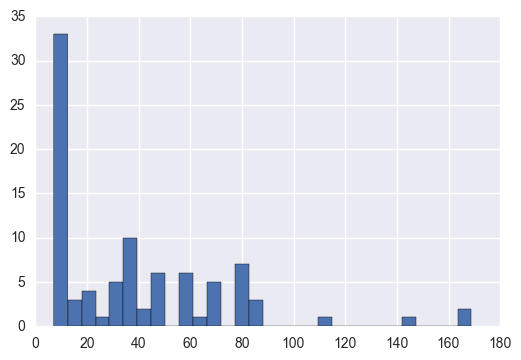

In [238]:
import pandas as pd #to write/read/work with csv files.
import numpy as np #to do math
import matplotlib.pyplot as plt #To make plots
import seaborn as sns #for additional plot features
%matplotlib inline
df.height.hist(bins=30)

In [239]:
df.height.mode()

0    10.286
dtype: float64

In [148]:
heights.index(max(heights))

8

In [166]:
test[3]

<LTTextBoxHorizontal(3) 207.536,1151.210,752.701,1359.490 'GRIDLOCK SHUTS\nU.S. GOVERNMENT\n'>

In [145]:
np.mean(heights)

21.979411764705887

In [ ]:
#new try

In [45]:
from io import StringIO

In [36]:
base_path

'C:/Users/Kyle/Documents/Blog Posts/Newseum/20131001'

In [104]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import HTMLConverter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
#from cStringIO import StringIO
from io import StringIO
from io import BytesIO
import re
import csv


def convert_pdf_to_html(path):
    rsrcmgr = PDFResourceManager()
    #retstr = StringIO()
    retstr=BytesIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = HTMLConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    #device = HTMLConverter(rsrcmgr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    #fp=path
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0 #is for all
    caching = True
    pagenos=set()
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)
    fp.close()
    device.close()
    Str = retstr.getvalue()
    retstr.close()
    return Str
#     return ''

In [107]:
n=35;
p=os.path.join(base_path + "/" + files_pdf[n])
p

'C:/Users/Kyle/Documents/Blog Posts/Newseum/20131001/20131001_AUT_KZ.pdf'

In [108]:
convert_pdf_to_html(p)

PDFTextExtractionNotAllowed: Text extraction is not allowed: <_io.BufferedReader name='C:/Users/Kyle/Documents/Blog Posts/Newseum/20131001/20131001_AUT_KZ.pdf'>

In [ ]:
#end new try

In [253]:
y=0;
for n in range(0,len(files_pdf)):
#for n in range(0,50):
    try:
        t1=time.time()
        #if n%5==0:
        print(n)
        text=pdfminer(n)
        if 'shutdown' in text.lower():
            y=y+1
        t2=time.time()
        tdiff=np.round((t2-t1)/60,2)
        print(tdiff)
    except:
        pass
print("%s front pages contained the word 'shutdown', or %s percent of total"%(y,y/len(files_pdf)))

0
0.02
1
0.03
2
0.02
3
0.0
4
0.01
5
0.02
6
0.02
7
0.01
8
0.01
9
0.01
10
0.01
11
0.01
12
0.01
13
0.01
14
0.06
15
0.05
16
0.01
17
0.01
18
0.01
19
0.01
20
0.01
21
0.01
22
0.02
23
0.0
24
0.04
25
0.0
26
0.12
27
0.01
28
0.03
29
0.02
30
0.02
31
0.01
32
0.02
33
0.03
34
0.2
35
26.42
36
0.04
37
0.03
38
0.05
39
0.04
40
0.02
41
0.03
42
0.03
43
0.02
44
0.05
45
0.02
46
0.03
47
0.03
48
0.01
49
0.01
50
0.04
51
0.02
52
0.03
53
0.03
54
0.01
55
0.16
56
0.02
57
0.07
58
0.03
59
0.09
60
0.03
61
0.06
62
0.03
63
0.15
64
0.03
65
0.04
66
0.02
67
0.06
68
0.04
69
0.02
70
0.05
71
0.04
72
0.04
73
0.03
74
0.04
75
0.03
76
0.01
77
0.02
78
0.03
79
0.04
80
0.04
81
0.05
82
0.33
83
0.03
84
0.03
85
0.05
86
0.05
87
0.05
88
0.03
89
0.01
90
0.03
91
0.05
92
0.04
93
0.02
94
0.51
95
0.04
96
0.03
97
0.03
98
0.05
99
0.02
100
0.03
101
0.02
102
0.04
103
0.02
104
0.01
105
0.03
106
0.03
107
0.12
108
0.06
109
0.03
110
0.06
111
0.02
112
0.03
113
0.02
114
0.04
115
0.02
116
0.03
117
0.04
118
0.03
119
0.06
120
0.01
121
0.09
122
0.03
123
0.

In [245]:
'shutdown' in text.lower()

True

In [246]:
n=10;
print(files_pdf[n])
text=pdfminer(n)
if 'shutdown' in text.lower():
    print('True')

20180120_AL_TD.pdf
True


In [221]:
document = PDFDocument(parser, password)

In [222]:
if not document.is_extractable:
    raise PDFTextExtractionNotAllowed

In [223]:
rsrcmgr = PDFResourceManager()
laparams = LAParams()

In [224]:
device = PDFPageAggregator(rsrcmgr, laparams=laparams)

In [225]:
interpreter = PDFPageInterpreter(rsrcmgr, device)

In [226]:
extracted_text=""
for page in PDFPage.create_pages(document):
    # As the interpreter processes the page stored in PDFDocument object
    interpreter.process_page(page)
    # The device renders the layout from interpreter
    layout = device.get_result()
    # Out of the many LT objects within layout, we are interested in LTTextBox and LTTextLine
    for lt_obj in layout:
        if isinstance(lt_obj, LTTextBox):# or isinstance(lt_obj, LTTextLine):
            extracted_text += lt_obj.get_text()

#close the pdf file
fp.close()

In [227]:
print(extracted_text)

One dollar
SATURDAY, JANUARY 20, 2018
newsminer.com
T H E   V O I C E   O F   I N T E R I O R   A L A S K A
Inside Today
Ice Dogs extend unbeaten streak with win over Coulee Region. » SPORTS B1
Government shuts down
Democrats, Republicans blame each other
By Zeke Miller, Andrew 
Taylor and Alan Fram  
ASSOCIATED PRESS
WASHINGTON  —  The  federal 
government shut down at the 
stroke of midnight Friday, halt-
ing all but the most essential 
operations  and  marring  the 
one-year anniversary of Presi-
dent Donald Trump’s inaugu-
ration in a striking display of 
Washington dysfunction.
Last-minute  negotiations 
crumbled as Senate Democrats 
blocked a four-week stopgap 
extension in a late-night vote, 
causing the fourth government 
shutdown in a quarter century. 
The slide toward closure lacked 
for  high  drama:  The  Senate 
vote was all but predetermined, 
and since the shutdown began 
at the start of a weekend, many 
The Capitol is illuminated 
Friday evening in 
Washington. AP PHOTO

In [99]:
url=soup_pdf_links[0];
html=urlopen(url).read()
#t=strftime("%Y-%m-%d %H:%M:%S", gmtime())
#t=t.replace("-","").replace(" ","").replace(":","")
#with open("C:\Users\Kyle\Documents\Blog Posts\Newseum/nytimes_%s.html"%(t), "w") as file:
#    file.write(str(html))

In [50]:
#list variables here:



#modify the url here:
url="";
html=urlopen(url)
#This next section navigates through the html and prints the date to help verify
#the variable string replacement was successful. We'll get into using BeautifulSoup in the next section!
#Fow now, just treat it asa a black box
from bs4 import BeautifulSoup #black box
soup=BeautifulSoup(html.read(),'html.parser') #black box
print(soup.find('h2',class_='history-date').contents) #black box

['Saturday, February 8, 2014']


## Navigating the downloaded html

In the previous code block, the html of the downloaded was navigated using BeautifulSoup, a python module designed to make getting to the sections of html you care about easier. In that case, the html was read into BeautifulSoup which allowed me to navigate straight to the html section that was type='h2', class='history-date'. This section guides you to finding the section of the html where the temperature data is stored.

To begin, let's get the html into BeautifulSoup and just ask it to print out everything that's there:

In [177]:
from bs4 import BeautifulSoup
html=urlopen(url);
soup=BeautifulSoup(html.read(),'html.parser')
print(soup)

If you've never seen the html of a webpage before, this can look quite intimidating. Learning all about html is outside the scope of this project. For now, just note that every html feature on the webpage has some sort of label, which BeautifulSoup can use to locate.

Instead of looking through this html for what you want, it's often much easier to open the page in a browser and 'inspect element' to see the underlaying html code.

At least on my computer, that's just a rightclick->inspect element on the feature I want the html tag infomation for.

You should try this yourself. First find the html for the bold date and make sure it is the same as in the black box code above.

Next, find the write tags to get the actual mean temperature on Feb. 8th, 2014. (you should get "['31']")

Example from black box above:

In [ ]:
#write your terms in here
print(soup.find('',class_='').contents)

So are we in the clear? Almost, but try looking up the tags for the average mean temperature. They probably look the same as for the actual mean temperature.

While each object in the html has tags, they are not all unique. We can see this by using find_all instead of find.

Example:

In [71]:
print(soup.find_all('h2'))

[<h2 class="city-nav-header is-parent">
		Alvadore, OR
		<i class="fi-star favorite-star " data-zmw="97409.4.99999"></i>
<dfn class="no-decoration" data-definition="Add/Remove home city location.">
<i class="fi-home homecity-button notHomepage" onclick="wui.favorites.home.toggle('97409.4.99999', this, 'isHomepage', 'notHomepage', 'Mahlon Sweet, OR');return false;"></i>
</dfn>
<i class="fi-list favorite-menu right-off-canvas-toggle none"></i>
</h2>, <h2 class="history-date">Saturday, February 8, 2014</h2>, <h2>Daily Weather History Graph</h2>, <h2>
		Hourly Weather History &amp; Observations
		</h2>]


Try the same with the tags used to get the temperature values:

In [73]:
print(soup.find_all('',class_=''))

If you were successful, we have all the data we want. The first 8 entries are the various temperature records. We just need to peel them away and save them somewhere locally.

Of course, this all goes wrong if every page isn't exactly like this page. We could be fancier and build in some checks, etc. But we won't worry about that here.

However, if you'd like to get a bit more information from that table, here's an example code to do just that:

In [98]:
#All the historical data is in a table in the html (inspect element around the browser to see this).
#I start by only looking at the table
soup2=soup.find('table', class_='responsive airport-history-summary-table');
#each row of the table has it's only class "indent", so I find all of those:
classSet=soup2.find_all(class_='indent');
#I then can go to a particular row and print out all values within that row
a=classSet[0] #change here to go to a different row
print(a)
#Each sibling group only has size 8. I let the range run to 10 to show how break is used in the if statment.
for x in range(0,10):
    a=a.next_sibling
    print(a)
    if 'wx-value' in str(a):
        b=a.find(class_='wx-value')
        print(b.contents)
    if a==None:
        break

<td class="indent"><span>Mean Temperature</span></td>


<td>
<span class="wx-data"><span class="wx-value">31</span><span class="wx-unit"> °F</span></span>
</td>
['31']


<td>
<span class="wx-data"><span class="wx-value">42</span><span class="wx-unit"> °F</span></span>
</td>
['42']


<td> </td>


None


## Saving the data locally

Now that we have the data, we need to save it somewhere locally. To do that we will use the python module pandas, which is very useful for creating dataframes (think excel tables).

example:

In [114]:
import pandas as pd
df=pd.DataFrame(columns=['Col1','Col2','Col3','Col4']);
df.loc[0,'Col1']='A' #appending the date using the .loc method to make use of the column name
vals=['b','c','d']
df.iloc[0,1:]=vals #appending the temperature data using the .iloc method to make use of column locations
df

,Col1,Col2,Col3,Col4
0,A,b,c,d


Create a pandas dataframe with 9 columns. The first should be for the date the data came from. The remaining 8 should be for the various temperature values given on the webpage.

In [142]:
df=

Now to add the values.

First, save the date information.

In [143]:
#df.loc[0,'']=soup.find('',class_='').contents

To save the temperature date, I suggest using a for loop to go through the first 8 returns from the find_all code above.

Example:

In [151]:
tableData=soup.find_all('span',class_='wx-value')
for x in range(0,8):
    print(tableData[x].contents)

['31']
['42']
['32']
['50']
['67']
['29']
['35']
['8']


In [149]:
df

,Date,1,2,3,4,5,6,7,8
0,"[Saturday, February 8, 2014]",[31],[42],[32],[50],[67],[29],[35],[8]


Short section, right?

## Repeating the above steps for many pages.

Finally, we want to repeat this process for many different dates. 

Recall from section 1 that we used variable string replacement to control which url we were opening:

In [133]:
year='2014';
month='02';
day='08';
#modify the url here:
url="https://www.wunderground.com/history/airport/KEUG/%s/%s/%s/DailyHistory.htmlreq_city=Eugene&req_state=OR&req_statename=Oregon&reqdb.zip=97404&reqdb.magic=1&reqdb.wmo=99999" % (year, month, day);
html=urlopen(url)
#This next section navigates through the html and prints the date to help verify
#the variable string replacement was successful. We'll get into using BeautifulSoup in the next section!
#Fow now, just treat it asa a black box
from bs4 import BeautifulSoup #black box
soup=BeautifulSoup(html.read(),'html.parser') #black box
print(soup.find('h2',class_='history-date').contents) #black box

['Saturday, February 8, 2014']


Now we want a way to automatically go through many dates. We can use the python module datetime to easily move through dates:

example:

In [137]:
import datetime
print(datetime.date.today())
print(datetime.date(2014,2,8))

2017-01-05
2014-02-08


What makes datetime nice is it allows for basic addition and subtraction of days.

Example:

In [139]:
one_day = datetime.timedelta(days=1);
one_week= datetime.timedelta(days=7);
print(datetime.date.today())
print(datetime.date.today()-one_day)
print(datetime.date.today()-one_week)

2017-01-05
2017-01-04
2016-12-29


The only tricky thing is you have to ask for the datetime to give you the values of the date if you want them for another application.

Example:

In [156]:
date1=datetime.date.today()
print(date1)
print(type(date1))
date2=date1.strftime('%Y %m %d') #Asking for the values in a string. %Y gives 4 digit year. %y gives 2 digit year.
print(date2)
print(type(date2))
date3=date2.split(' ')
yr,mo,da=date3
print(yr)
print(mo)
print(da)

2017-01-05
<class 'datetime.date'>
2017 01 05
<class 'str'>
2017
01
05


Use date time to get the right numbers to put into the url for the weather on  Feb. 5th, 2014.

In [160]:
#use datetime to fill in the variables year, month, and day:
year,month,day=

url="https://www.wunderground.com/history/airport/KEUG/%s/%s/%s/DailyHistory.htmlreq_city=Eugene&req_state=OR&req_statename=Oregon&reqdb.zip=97404&reqdb.magic=1&reqdb.wmo=99999" % (year, month, day);
html=urlopen(url)
from bs4 import BeautifulSoup
soup=BeautifulSoup(html.read(),'html.parser')
print(soup.find('h2',class_='history-date').contents)

['Wednesday, February 5, 2014']


Finally, write a loop to visit the days from Feb. 5th, 2014 to Feb. 13, 2014.

Example:

In [165]:
startingDay=datetime.date.today()
one_day=datetime.timedelta(days=1);
for x in range(0,7):
    print(startingDay)
    startingDay=startingDay-one_day

2017-01-05
2017-01-04
2017-01-03
2017-01-02
2017-01-01
2016-12-31
2016-12-30


In [179]:
#choose a starting date with datetime here:
startingDay=
#define the number of days we will go through with each step here:
one_day = 
#write the loop here:


## Combine it all.

The time has finally come to combine everything to make a viable webscraper. Write a webscraper to collect the last 30 days of temperature values.

A few hints: 

    1) create your dataframe at the beginning, before you enter your for loop.
    
    2) If you have nested for loops, make sure they don't have the same variable.
    
    3) To test, run your for loop just a few times instead of over the entire range.
    
Good luck!

In [170]:

df

,Date,1,2,3,4,5,6,7,8
0,"[Thursday, January 5, 2017]",[24],[40],[33],[46],[67],[15],[34],[15]
1,"[Wednesday, January 4, 2017]",[28],[40],[33],[46],[69],[21],[34],[14]
2,"[Tuesday, January 3, 2017]",[30],[40],[35],[46],[60],[25],[34],[9]
3,"[Monday, January 2, 2017]",[34],[40],[37],[46],[57],[30],[34],[8]
4,"[Sunday, January 1, 2017]",[36],[39],[39],[45],[61],[34],[34],[7]
5,"[Saturday, December 31, 2016]",[33],[39],[36],[45],[62],[29],[34],[10]
6,"[Friday, December 30, 2016]",[39],[39],[47],[45],[66],[31],[33],[10]
7,"[Thursday, December 29, 2016]",[43],[39],[53],[45],[63],[33],[33],[12]
8,"[Wednesday, December 28, 2016]",[36],[39],[41],[45],[65],[30],[33],[19]
9,"[Tuesday, December 27, 2016]",[44],[39],[47],[45],[61],[40],[33],[16]


## Extras:

If you have time, you can clean up your saved data. You might have noticed 

In [115]:
soup.find('h2',class_='history-date').contents

['Saturday, February 8, 2014']

In [125]:
datetime.datetime.strptime('Saturday','%A')

datetime.datetime(1900, 1, 1, 0, 0)

In [128]:
datetime.datetime.strptime('February','%B')

datetime.datetime(1900, 2, 1, 0, 0)

In [132]:
datetime.datetime.strptime('Saturday February 8 2014', '%A %B %d %Y')

datetime.datetime(2014, 2, 8, 0, 0)